In [1]:
import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.decomposition import PCA
import pandas as pd

# Question 2

In [2]:
## load dataset
mdata = MNIST('samples')
train_images, train_labels = mdata.load_training()
test_images, test_labels = mdata.load_testing()

In [3]:
## convert each to a numpy array
train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [4]:
print("Train Data Count: ",train_labels.shape)
print("Test Data Count: ", test_labels.shape )

Train Data Count:  (60000,)
Test Data Count:  (10000,)


First train image label:  5
First train image image below:


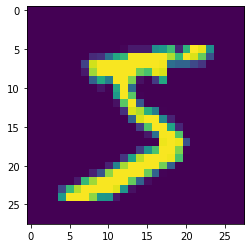

In [5]:
## let's look at the data

print('First train image label: ',train_labels[0])
print('First train image image below:')
plt.imshow(train_images[0].reshape(28, 28))
plt.show()

## Part A
Use Support Vectors machine for multiclassification problem we have, and train a model for it. <br>
We're using the svm from sklearn library. The instance SVC is a svm model supporting multiclassifications problem. SVC tries to maximize the margin with boundary with respect to a parameter *C* that is our missclassification parameter containing the penalty error. Our Kernel function when we do not specify anything is radias basis kernel function (*rbf*) and the formula for it is
\begin{equation}
K(x,x') = \exp(-\frac{||x-x'||}{2\sigma^2})
\end{equation}
And $\sigma$ is a free parameter and can be set to anything.

In [6]:
######## Train the model ########
model_svm = svm.SVC()
model_svm.fit(train_images, train_labels)

SVC()

In [7]:
## See how many support vector we have
print(len(model_svm.support_vectors_))

12336


In [9]:
## classify new unseen images
predict_test_res = model_svm.predict(test_images)

In [10]:
predict_test_res = np.array(predict_test_res)

In [11]:
def create_confusion_matrix(target_labels, classified_labels, classes):
    """
    Create the Confusion matrix for the classifier

    INPUTS:
    --------
    classified_labels: numpy array of classification result
    traget_labels: numpy array of right labels for data
    classes:  numpy array of unique elements, containing the class labels

    OUTPUT:
    ---------
    confusion_matrix:  the confusion matrix for the classification process 
    """

    ## check the inputs
    assert target_labels.shape == classified_labels.shape, "inputs doesn't have same shape!!"


    ## find how many classes we have
    classes_count = len(classes)

    ## confusion_matrix array to save each value
    ## initialize with zero values
    confusion_matrix = np.zeros((classes_count, classes_count))

    ## compute each row 
    for row_idx, class_num in enumerate(classes):

        ## create an array of zero values to be updated
        confusion_matrix_row = np.zeros(classes_count)

        ## compute True Positive
        TP = ( (target_labels == class_num) == classified_labels).sum()
        
        confusion_matrix_row[row_idx] = TP
        
        ## compute other false classified elements of each row
        ## array idx is to save each value of confusion matrix in its index
        for array_idx, classified_false in enumerate(classes):
            ## if we reached the TP elemnt in matrix continue the loop
            if classified_false == class_num:
                continue
            
            count = ((target_labels == class_num) == classified_false).sum()
            confusion_matrix_row[array_idx] = count
        
        ## add the new row to the confusion matrix
        confusion_matrix[row_idx] = confusion_matrix_row


    ## convert to a numpy matrix
    confusion_matrix = np.matrix(confusion_matrix)

    return confusion_matrix        

def compute_accuracy(target_labels, classified_labels):
    """
    compute the accuracy of classification

    INPUTS:
    --------
    classified_labels: numpy array of classification result
    traget_labels: numpy array of right labels for data

    OUPUT:
    --------
    accuracy:  floating value of accuracy
    """
    acc = (target_labels == classified_labels).sum()
    accuracy = (acc / len(target_labels)) * 100
    return accuracy

In [12]:
## print the confusion matrix
confusion_matrix = create_confusion_matrix(test_labels, predict_test_res, np.unique(train_labels))

dataframe_column = ['Class 0', 'Class 1','Class 2','Class 3','Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
df_confusion_matrix = pd.DataFrame(confusion_matrix, columns= dataframe_column, index= dataframe_column)
df_confusion_matrix

,Class 0,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9
Class 0,20.0,980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Class 1,8865.0,2119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Class 2,8968.0,1032.0,988.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Class 3,8990.0,1010.0,0.0,993.0,0.0,0.0,0.0,0.0,0.0,0.0
Class 4,9018.0,982.0,0.0,0.0,993.0,0.0,0.0,0.0,0.0,0.0
Class 5,9108.0,892.0,0.0,0.0,0.0,991.0,0.0,0.0,0.0,0.0
Class 6,9042.0,958.0,0.0,0.0,0.0,0.0,989.0,0.0,0.0,0.0
Class 7,8972.0,1028.0,0.0,0.0,0.0,0.0,0.0,999.0,0.0,0.0
Class 8,9026.0,974.0,0.0,0.0,0.0,0.0,0.0,0.0,990.0,0.0
Class 9,8991.0,1009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,994.0


In [13]:
## save the confusion matrix in a directory
df_confusion_matrix.to_csv('results/Q2_partA_confusion_matrix.csv')

In [14]:
## compute the accuracy of svm model
compute_accuracy(test_labels, predict_test_res)

97.92

## Part B
Reducing data with PCA method, saving 0.9 of data variance and using svd_solver.

In [15]:
model_pca = PCA(n_components=0.9, svd_solver='full')

In [16]:
model_pca.fit(train_images, train_labels)

PCA(n_components=0.9, svd_solver='full')

In [17]:
## look at the variances of data
model_pca.explained_variance_ratio_

array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797,
       0.04312231, 0.0327193 , 0.02883895, 0.02762029, 0.02357001,
       0.0210919 , 0.02022991, 0.01715818, 0.01692111, 0.01578641,
       0.01482953, 0.01324561, 0.01276897, 0.01187263, 0.01152684,
       0.01066166, 0.01006713, 0.00953573, 0.00912544, 0.00883405,
       0.00839319, 0.00812579, 0.00786366, 0.00744733, 0.00690859,
       0.00658094, 0.00648148, 0.00602615, 0.00586582, 0.00570021,
       0.00543628, 0.00505786, 0.00487859, 0.00481429, 0.00472266,
       0.00456747, 0.00444836, 0.00418501, 0.00398215, 0.00384975,
       0.00375103, 0.00362009, 0.00351591, 0.00340058, 0.00321874,
       0.00319017, 0.00312805, 0.00295983, 0.00288955, 0.0028413 ,
       0.00271436, 0.00269521, 0.00258473, 0.00253771, 0.00244781,
       0.00240506, 0.00239263, 0.00230408, 0.00221532, 0.00213721,
       0.00207225, 0.00203043, 0.00196783, 0.00192853, 0.00188632,
       0.00186977, 0.00181083, 0.00177562, 0.00174898, 0.00165

In [18]:
print('Befor dimension reduction shape ', len(train_images[0]))
train_images_reduced = model_pca.transform(train_images)
print('After dimension reduction shape ', len(train_images_reduced[0]))

Befor dimension reduction shape  784
After dimension reduction shape  87


In [19]:
model_svm_reduced = svm.SVC()
model_svm_reduced.fit(train_images_reduced, train_labels)

SVC()

In [20]:
## reduce test images
test_images_reduced = model_pca.transform(test_images)

In [21]:
## use the reduced dimension svm model to classify unseen data
predict_test_reduction_res = model_svm_reduced.predict(test_images_reduced)

In [22]:
reduced_data_confusion_matrix = create_confusion_matrix(test_labels, predict_test_reduction_res, np.unique(train_labels))

dataframe_column = ['Class 0', 'Class 1','Class 2','Class 3','Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
df_reduced_data_confusion_matrix = pd.DataFrame(reduced_data_confusion_matrix, columns= dataframe_column, index= dataframe_column)
df_reduced_data_confusion_matrix

,Class 0,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9
Class 0,18.0,980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Class 1,8865.0,2121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Class 2,8968.0,1032.0,987.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Class 3,8990.0,1010.0,0.0,992.0,0.0,0.0,0.0,0.0,0.0,0.0
Class 4,9018.0,982.0,0.0,0.0,992.0,0.0,0.0,0.0,0.0,0.0
Class 5,9108.0,892.0,0.0,0.0,0.0,990.0,0.0,0.0,0.0,0.0
Class 6,9042.0,958.0,0.0,0.0,0.0,0.0,989.0,0.0,0.0,0.0
Class 7,8972.0,1028.0,0.0,0.0,0.0,0.0,0.0,997.0,0.0,0.0
Class 8,9026.0,974.0,0.0,0.0,0.0,0.0,0.0,0.0,989.0,0.0
Class 9,8991.0,1009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,992.0


In [23]:
df_reduced_data_confusion_matrix.to_csv('results/Q2_partB_confusion_matrix.csv')

In [24]:
## see the accuracy of the reduced model
compute_accuracy(test_labels, predict_test_reduction_res)

98.44000000000001

## A comparison between part A and part B
In part A, the svm model takes 2 minutes and 29 seconds to be trained and about 1 minutes and 8 seconds to classify new images. But in part B with PCA data reduction, we could reduce the data from 784 dimensions into 87 dimension. This implies that we reduced the feature space size 784 into 87, And by this we could train the svm model and classify new data much faster. We saw that the training time is reduced to 41.2 seconds and the classification time is about just 11.4 seconds. <br>
We have also created the confusion matrixes and computed the accuracy of each part. From part A the accuracy was about 97.92 % and in part B we have found the accuracy 98.44 % which is slightly more. <br>
At last in summary the most important difference between part A and part B was the time needed to train and classification, that with data reduction we could achive the same results with much less time.     